In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import pickle
import mne

from mne.channels import make_1020_channel_selections
from mne.event import define_target_events
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm


from sklearn.model_selection import KFold, train_test_split, cross_validate
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

class_names = ['1','2','3']

In [25]:
#os.chdir('/home/castrogaray-j/U_Winnipeg_OneDrive/Pattern recognition/BICT/raw')
with open("/home/castrogaray-j/U_Winnipeg_OneDrive/Adv_Machine_learning/BCIT_Performance/ICA_Features/128hz_ICA_features_labels.pkl", 'rb') as file:
        df1 = pickle.load(file)

df1

,0,1,2,3,4,5,6,7,8,9,...,UVEOG,LVEOG,event,reaction times,subject,condition,label,drop 10,drop 20,3 classes
0,0.084989,-0.916956,-0.388628,0.083855,-0.236564,-1.848411,-0.396392,0.713492,0.192117,0.511456,...,-0.014608,-0.020247,1,1.676758,1,1,0,0.0,0.0,0.0
1,1.107207,-0.331166,-1.504027,1.304032,-0.592083,-0.178757,0.624183,1.106317,-0.096462,0.980616,...,-0.014606,-0.020257,1,1.676758,1,1,0,0.0,0.0,0.0
2,1.167326,-0.377016,-0.416510,0.950900,-0.783728,-1.503936,-0.045062,1.182786,-0.566672,0.401134,...,-0.014614,-0.020261,1,1.676758,1,1,0,0.0,0.0,0.0
3,0.494664,-0.365887,-0.281600,0.524532,0.417528,-2.686605,0.411120,1.397824,-0.927109,0.529492,...,-0.014611,-0.020250,1,1.676758,1,1,0,0.0,0.0,0.0
4,0.375475,-0.288874,-0.742493,1.378993,-1.032388,-3.122119,2.145708,-0.045169,-1.444271,0.691704,...,-0.014619,-0.020260,1,1.676758,1,1,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5899515,2.953678,1.174945,-2.842400,1.408583,0.037121,0.831700,2.204789,-1.357440,2.415951,-1.338769,...,0.007593,0.020684,165,2.080078,21,3,1,1.0,1.0,2.0
5899516,4.231343,1.900537,-3.539884,0.743793,-1.118554,0.351698,1.084732,-1.277365,2.388841,-1.323468,...,0.007587,0.020695,165,2.080078,21,3,1,1.0,1.0,2.0
5899517,4.921401,1.509534,-4.125722,-0.401942,-1.250832,0.407657,0.507237,-0.288033,2.553032,-0.416701,...,0.007578,0.020677,165,2.080078,21,3,1,1.0,1.0,2.0
5899518,4.130485,-0.679918,-4.294834,-1.642411,-1.136441,-0.137082,0.426581,-0.150943,2.853915,-0.459514,...,0.007580,0.020674,165,2.080078,21,3,1,1.0,1.0,2.0


In [28]:
df = df1.drop(['event', 'reaction times', 'subject', 'condition', '3 classes', 'drop 10', 'drop 20'], axis=1)
df = df.iloc[:, :-5].join(df.iloc[:, -1])
df = df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,label
0,0.084989,-0.916956,-0.388628,0.083855,-0.236564,-1.848411,-0.396392,0.713492,0.192117,0.511456,0
1,1.107207,-0.331166,-1.504027,1.304032,-0.592083,-0.178757,0.624183,1.106317,-0.096462,0.980616,0
2,1.167326,-0.377016,-0.416510,0.950900,-0.783728,-1.503936,-0.045062,1.182786,-0.566672,0.401134,0
3,0.494664,-0.365887,-0.281600,0.524532,0.417528,-2.686605,0.411120,1.397824,-0.927109,0.529492,0
4,0.375475,-0.288874,-0.742493,1.378993,-1.032388,-3.122119,2.145708,-0.045169,-1.444271,0.691704,0
...,...,...,...,...,...,...,...,...,...,...,...
5899515,2.953678,1.174945,-2.842400,1.408583,0.037121,0.831700,2.204789,-1.357440,2.415951,-1.338769,1
5899516,4.231343,1.900537,-3.539884,0.743793,-1.118554,0.351698,1.084732,-1.277365,2.388841,-1.323468,1
5899517,4.921401,1.509534,-4.125722,-0.401942,-1.250832,0.407657,0.507237,-0.288033,2.553032,-0.416701,1
5899518,4.130485,-0.679918,-4.294834,-1.642411,-1.136441,-0.137082,0.426581,-0.150943,2.853915,-0.459514,1


In [4]:
df.shape[0] / 128*5

183950.0

In [5]:
128*5
#int(1024*4 /16)
#46918602 / 1024

640

{0: 5423, 1: 3795}
10
2
Epoch 1/30, Loss: 0.7498
auc:0.6318611609814482 accuracy:0.6215629522431259
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 30, 'lr': 1e-05, 'nhead': 2, 'num_layers': 8}, Validation Accuracy: 0.6215629522431259
Epoch 3/30, Loss: 0.6384
auc:0.6318415755399597 accuracy:0.5296671490593343
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 30, 'lr': 1e-05, 'nhead': 2, 'num_layers': 8}, Validation Accuracy: 0.5296671490593343
Epoch 5/30, Loss: 0.6495
auc:0.6393841466731951 accuracy:0.6447178002894356
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 30, 'lr': 1e-05, 'nhead': 2, 'num_layers': 8}, Validation Accuracy: 0.6447178002894356
Epoch 7/30, Loss: 0.6706
auc:0.6357586638376584 accuracy:0.6360347322720694
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 30, 'lr': 1e-05, 'nhead': 2, 'num_layers': 8}, Validation Accuracy: 0.6360347322720694
Epoch 9/30, Loss: 0.6688
auc:0.6314019911865514 accuracy:0.6374819102749638
Params: {'d_model': 64, 'dropout': 0.1, 'epochs'

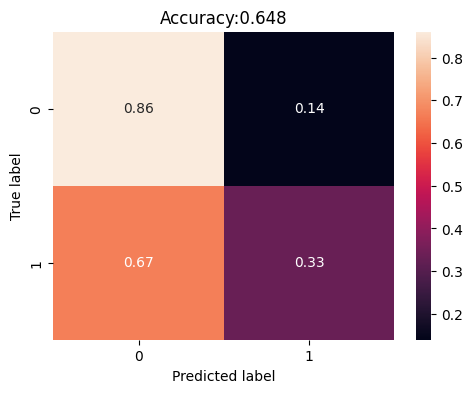

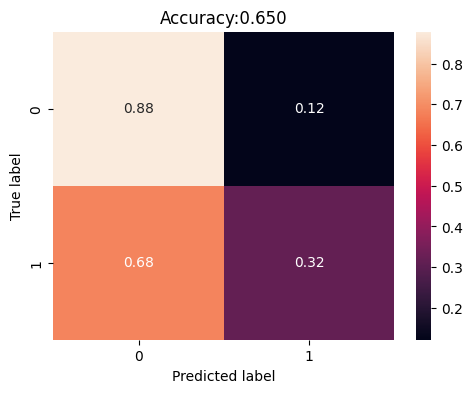

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid
device = torch.device("cuda:1")
# Define a custom dataset class for EEG data
class EEGDataset(Dataset):
    def __init__(self, data, labels):
        """
        data: Tensor of shape (num_samples, seq_len, num_channels)
        labels: Tensor of shape (num_samples,)
        """
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Transformer-based EEG classifier
class EEGTransformerClassifier(nn.Module):
    def __init__(self, num_channels, seq_len, num_classes, d_model=128, nhead=8, num_layers=4, dropout=0.1):
        super(EEGTransformerClassifier, self).__init__()

        self.embedding = nn.Linear(num_channels, d_model)
        self.positional_encoding = nn.Parameter(torch.zeros(1, seq_len, d_model))

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.classifier = nn.Sequential(
            nn.Linear(d_model, 128),
            #nn.Linear(d_model, 10),
            nn.ReLU(),
            nn.Dropout(dropout),
            #nn.Linear(10, num_classes),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        # x shape: (batch_size, seq_len, num_channels)
        x = self.embedding(x)  # Shape: (batch_size, seq_len, d_model)
        x = x + self.positional_encoding
        x = x.permute(1, 0, 2)  # Shape: (seq_len, batch_size, d_model)
        x = self.transformer_encoder(x)  # Shape: (seq_len, batch_size, d_model)
        x = x.mean(dim=0)  # Shape: (batch_size, d_model)
        x = self.classifier(x)  # Shape: (batch_size, num_classes)
        return x

# Data processing function
def preprocess_eeg_data(df, seq_len=256):
    """
    Preprocess the EEG data from a CSV file.
    
    Args:
        file_path: Path to the CSV file containing the data.
        seq_len: Length of each sequence (window size).

    Returns:
        data: Tensor of shape (num_samples, seq_len, num_channels)
        labels: Tensor of shape (num_samples,)
    """
    # Load data
    #df = pd.read_csv(file_path)

    # Extract labels and channels
    labels = df.iloc[:, -1].values.astype('int32') #- 1  # Last column is the label
    channels = df.iloc[:, :-1].values  # First 64 columns are channels

    # Normalize the channel data (z-score normalization)
    channels = (channels - np.mean(channels, axis=0)) / np.std(channels, axis=0)

    # Reshape into windows
    num_samples = channels.shape[0] // seq_len
    truncated_len = num_samples * seq_len

    channels = channels[:truncated_len].reshape(num_samples, seq_len, -1)
    labels = labels[:truncated_len:seq_len]  # Take one label per window

    # Convert to tensors
    data = torch.tensor(channels, dtype=torch.float32)
    labels = torch.tensor(labels, dtype=torch.long)

    return data, labels

# Train, validation, and test split
def split_data(dataset, train_ratio=0.7, val_ratio=0.15):


    train_size = int(train_ratio * len(dataset))
    val_size = int(val_ratio * len(dataset))
    test_size = len(dataset) - train_size - val_size
    #test_size = int(val_ratio * len(dataset))

    return random_split(dataset, [train_size, val_size, test_size])

from sklearn.metrics import accuracy_score
def classifier_assessment(y_test, predicted):
    confusion_mc = confusion_matrix(y_test, predicted)
    report = classification_report(y_test, predicted)
    print(report)
    #confusion_mc = confusion_mc.astype('float') / confusion_mc.sum(axis=1)[:, np.newaxis]
    confusion_mc = confusion_mc/ np.sum( confusion_mc, axis=1)[:,np.newaxis]
    classes = list(set(y_test))
    df_cm = pd.DataFrame(confusion_mc,
                         #index = [i for i in range(1,4)], columns = [i for i in range(1,4)])
                         index = classes, columns = classes)

    plt.figure(figsize=(5.5,4))
    sns.heatmap(df_cm, annot=True)
    plt.title('Accuracy:{0:.3f}'.format(accuracy_score(y_test,
                                                                           predicted)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return report

def test_model(model, test_loader, print_report=True):
    report = None
    from sklearn.metrics import roc_auc_score
    model.eval()
    all_preds = []
    all_labels = []
    all_prob = [ ]
    
    
    
    with torch.no_grad():
        for psd_batch, labels_batch in test_loader:
            psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
            outputs = model(psd_batch)
            all_prob.extend( outputs[:,1].cpu().numpy() )
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    if print_report:
        report = classifier_assessment(all_labels,all_preds)
    auc = roc_auc_score(all_labels, all_prob )
    accuracy_global = accuracy_score(all_labels, all_preds )

    print(f'auc:{auc} accuracy:{accuracy_global}')
    
    accuracy = accuracy_score(all_labels, all_preds)
    #print(f"Accuracy: {accuracy:.4f}")
    return accuracy, report

# Grid search for hyperparameter optimization
def grid_search(data, labels, param_grid, seq_len, num_classes, num_channels):
    
    best_params = None
    best_accuracy = 0

    dataset = EEGDataset(data, labels)
    train_data, val_data, test_data = split_data(dataset)

    train_loader = DataLoader(train_data, batch_size=24, shuffle=True)
    val_loader = DataLoader(val_data, batch_size=24, shuffle=False)
    test_loader = DataLoader(test_data, batch_size=24, shuffle=False)

    for params in ParameterGrid(param_grid):
        model = EEGTransformerClassifier(
            num_channels=num_channels,
            seq_len=seq_len,
            num_classes=num_classes,
            d_model=params['d_model'],
            nhead=params['nhead'],
            num_layers=params['num_layers'],
            dropout=params['dropout']
        )
        #device = torch.device("cuda:0")
        #model= nn.DataParallel(model, device_ids=[0,1,2])
        model.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=params['lr'])

        #loss_tmp = 1
        # Training loop
        for epoch in range(params['epochs']):
            model.train()
            for batch_data, batch_labels in train_loader:
                batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
                optimizer.zero_grad()
                outputs = model(batch_data)
                loss = criterion(outputs, batch_labels)
                loss.backward()
                optimizer.step()
            if epoch % 2 == 0:
                print(f"Epoch {epoch+1}/{params['epochs']}, Loss: {loss.item():.4f}")
                accuracy, report = test_model(model, val_loader, print_report=False)
                print(f"Params: {params}, Validation Accuracy: {accuracy}")
                # if loss > loss_tmp + 0.1:
                #     break
                # loss_tmp = loss

        '''# Validation loop
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for batch_data, batch_labels in val_loader:
                batch_data, batch_labels = batch_data.to(device), batch_labels.to(device)
                outputs = model(batch_data)
                _, predicted = torch.max(outputs, 1)
                total += batch_labels.size(0)
                correct += (predicted == batch_labels).sum().item()

        accuracy = correct / total'''
        accuracy, report = test_model(model, val_loader)
        print(f"Params: {params}, Validation Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            best_model = model

    print(f"Best Params: {best_params}, Best Validation Accuracy: {best_accuracy}")
    test_model(best_model, test_loader)
    return best_params, best_model



seq_len = 128*5 # TO ENSURE THAT THE SEQUENCE LENGTH IS A SEGMENT OF 5 SECONDS
#num_classes = 2  

# Preprocess data
data, labels = preprocess_eeg_data(df, seq_len=seq_len)
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))
#labels[labels != 0] = 1
num_channels = data.shape[2]
print(num_channels)
num_classes = len(np.unique(labels))
print(num_classes)

# Define hyperparameter grid
# param_grid = {
#     'd_model': [64, 128], # [128], #64
#     'nhead': [4, 2, 8], # [ 8], # 2-4
#     'num_layers': [1, 2, 4], #[ 4], #1
#     'dropout': [0.1, 0.3],
#     'lr': [ 0.0001, 1e-5,1e-3],#, 1e-5],
#     'epochs': 14212 [10, 20, 30]
# }

param_grid = {
    'd_model': [ 64],
    'nhead': [ 2],
    'num_layers': [ 8],
    'dropout': [0.1],
    'lr': [ 1e-5], # [0.0001, 1e-5, 1e-3],
    'epochs': [ 30]
}

# Perform grid search
best_params, best_model = grid_search(data, labels, param_grid, seq_len, num_classes, num_channels)




In [107]:
with open("/home/castrogaray-j/U_Winnipeg_OneDrive/Adv_Machine_learning/BCIT_Performance/ICA_Features/5s_ICA_features_labels.pkl", 'rb') as file:
        df1 = pickle.load(file)

df = df1.drop(['event', 'reaction times', 'subject', 'condition', '3 classes', 'drop 10', 'label'], axis=1)
df = df.dropna()
df

,0,1,2,3,4,5,6,7,8,9,LHEOG,RHEOG,UVEOG,LVEOG,drop 20
0,0.587493,0.982030,0.193071,-0.270405,-0.275741,-1.219197,-0.709324,-0.324368,0.300045,1.796589,-0.011951,-0.013156,-0.014606,-0.020261,0.0
1,0.649061,0.995699,-0.057190,-0.345413,-0.323459,-1.011385,-0.913123,-0.256997,0.497644,1.857310,-0.011947,-0.013143,-0.014601,-0.020255,0.0
2,0.690730,0.977036,-0.300509,-0.453188,-0.355288,-0.831754,-1.059564,-0.209386,0.686016,1.909832,-0.011945,-0.013141,-0.014605,-0.020254,0.0
3,0.710200,0.925550,-0.524090,-0.584129,-0.370803,-0.694255,-1.140996,-0.182590,0.851223,1.953898,-0.011949,-0.013137,-0.014604,-0.020248,0.0
4,0.707057,0.842451,-0.716072,-0.727130,-0.370945,-0.610144,-1.154122,-0.175608,0.981010,1.989072,-0.011949,-0.013143,-0.014605,-0.020250,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47205373,-3.776499,0.483435,-0.815139,0.741300,-3.569910,0.911354,-0.825509,0.643191,-3.117115,-0.712453,0.004750,0.032960,0.007604,0.020696,1.0
47205374,-3.572670,0.424959,-0.966677,0.760766,-3.794275,0.787675,-0.663820,0.680048,-3.007231,-0.600562,0.004750,0.032961,0.007604,0.020699,1.0
47205375,-3.348966,0.353830,-1.115139,0.764612,-4.013622,0.659781,-0.497497,0.688729,-2.880754,-0.538682,0.004747,0.032956,0.007596,0.020695,1.0
47205376,-3.112607,0.277659,-1.250616,0.751484,-4.215166,0.530370,-0.335348,0.670757,-2.744844,-0.523861,0.004748,0.032953,0.007589,0.020692,1.0


In [72]:
channels = df.iloc[:, :-1].values  # First 64 columns are channels

# Normalize the channel data (z-score normalization)
#channels = (channels - np.mean(channels, axis=0)) / np.std(channels, axis=0)

# Reshape into windows
num_samples = channels.shape[0] // seq_len
truncated_len = num_samples * seq_len
print(num_samples, channels.shape[0], truncated_len)

channels = channels[:truncated_len].reshape(num_samples, seq_len, channels.shape[1])

7358 37680318 37680318


In [ ]:
pd.DataFrame( channels[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.587493,0.982030,0.193071,-0.270405,-0.275741,-1.219197,-0.709324,-0.324368,0.300045,1.796589,-0.011951,-0.013156,-0.014606,-0.020261
1,0.649061,0.995699,-0.057190,-0.345413,-0.323459,-1.011385,-0.913123,-0.256997,0.497644,1.857310,-0.011947,-0.013143,-0.014601,-0.020255
2,0.690730,0.977036,-0.300509,-0.453188,-0.355288,-0.831754,-1.059564,-0.209386,0.686016,1.909832,-0.011945,-0.013141,-0.014605,-0.020254
3,0.710200,0.925550,-0.524090,-0.584129,-0.370803,-0.694255,-1.140996,-0.182590,0.851223,1.953898,-0.011949,-0.013137,-0.014604,-0.020248
4,0.707057,0.842451,-0.716072,-0.727130,-0.370945,-0.610144,-1.154122,-0.175608,0.981010,1.989072,-0.011949,-0.013143,-0.014605,-0.020250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.117680,-0.483573,0.585525,1.296535,0.256177,-0.155772,-1.423885,0.150683,-0.326433,-0.623764,-0.011938,-0.013169,-0.014608,-0.020289
565,-0.105490,-0.429736,0.629293,1.371615,0.122418,-0.080350,-1.475738,0.205630,-0.316160,-0.626743,-0.011940,-0.013160,-0.014607,-0.020290
566,-0.092419,-0.368465,0.660385,1.442772,-0.029781,-0.018974,-1.485106,0.264112,-0.302917,-0.617199,-0.011940,-0.013159,-0.014606,-0.020286
567,-0.077817,-0.304738,0.678963,1.505663,-0.190376,0.025990,-1.449611,0.319017,-0.289671,-0.596446,-0.011941,-0.013170,-0.014606,-0.020285


In [ ]:
# def split_data(dataset, train_ratio=0.7, val_ratio=0.15):
#     train_size = int(train_ratio * len(dataset))
#     val_size = int(val_ratio * len(dataset))
#     test_size = len(dataset) - train_size - val_size

#     # Split the dataset sequentially
#     train_data = torch.utils.data.Subset(dataset, range(0, train_size))
#     val_data = torch.utils.data.Subset(dataset, range(train_size, train_size + val_size))
#     test_data = torch.utils.data.Subset(dataset, range(train_size + val_size, len(dataset)))

#     return train_data, val_data, test_data

def split_data(dataset, train_ratio=0.7, val_ratio=0.15):
    train_size = int(train_ratio * len(dataset))
    val_size = int(val_ratio * len(dataset))
    test_size = len(dataset) - train_size - val_size
    #test_size = int(val_ratio * len(dataset))

    return random_split(dataset, [train_size, val_size, test_size])

In [113]:
data, labels = preprocess_eeg_data(df, seq_len=seq_len)
dataset = EEGDataset(data, labels)

print(seq_len)

train_data, val_data, test_data = split_data(dataset)

train_loader = DataLoader(train_data, batch_size=24, shuffle=True)
val_loader = DataLoader(val_data, batch_size=24, shuffle=False)
test_loader = DataLoader(test_data, batch_size=24, shuffle=False)


5121


In [114]:
test_labels = [label for _, label in test_data]
test_labels = torch.tensor(test_labels)
test_labels

unique, counts = np.unique(test_labels, return_counts=True)
print(dict(zip(unique, counts)))

{0: 575, 1: 530}


              precision    recall  f1-score   support

           0       0.82      0.65      0.72       575
           1       0.69      0.84      0.76       530

    accuracy                           0.74      1105
   macro avg       0.75      0.75      0.74      1105
weighted avg       0.76      0.74      0.74      1105

auc:0.8017981952420017 accuracy:0.7420814479638009
 accuracy:0.7420814479638009


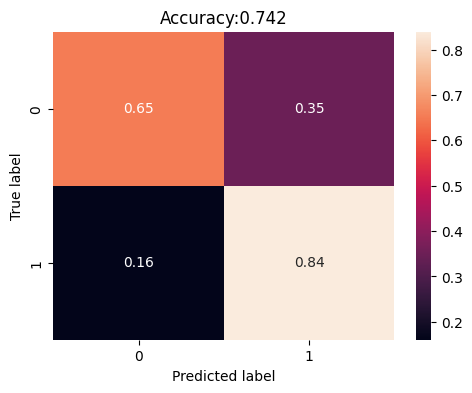

In [115]:
_,_, all_labels,all_preds = test_model(best_model, test_loader)

In [120]:
df.shape[0]*0.15/5121, len(all_labels)


(1103.7, 1105)

In [112]:
def test_model(model, test_loader, print_report=True):
    report = None
    from sklearn.metrics import roc_auc_score
    model.eval()
    all_preds = []
    all_labels = []
    all_prob = [ ]
    
    #psd_test = X_test.reshape(X_test.shape[0], 64, 5)
    #test_dataset = EEGDataset(psd_test, y_test)
    #test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    
    
    with torch.no_grad():
        for psd_batch, labels_batch in test_loader:
            psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
            outputs = model(psd_batch)
            all_prob.extend( outputs[:,1].cpu().numpy() )
            preds = torch.argmax(outputs, dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels_batch.cpu().numpy())

    if print_report:
        report = classifier_assessment(all_labels,all_preds)
    auc = roc_auc_score(all_labels, all_prob )
    accuracy_global = accuracy_score(all_labels, all_preds )

    print(f'auc:{auc} accuracy:{accuracy_global}')
    print(f' accuracy:{accuracy_global}')
    accuracy = accuracy_score(all_labels, all_preds)
    #print(f"Accuracy: {accuracy:.4f}")
    return accuracy, report, all_labels, all_preds

In [ ]:
# Extract labels and channels
labels = df.iloc[:, -2].values.astype('int32') - 1  # Last column is the label
channels = df.iloc[:, :-2].values  # First 64 columns are channels
seq_len = int(1024*5.0009765625)
num_samples = channels.shape[0] // seq_len
truncated_len = num_samples * seq_len
channels[:truncated_len].reshape(num_samples, seq_len, -1).shape

In [ ]:
test = df.values[:,:-2].reshape(-1, int(1024*5.0009765625)  , 64) == channels[:truncated_len].reshape(num_samples, seq_len, -1)
np.all(test)

In [ ]:
labels_2  = labels.reshape(-1, int(1024*5.0009765625) )
labels_2 = labels_2[:, 0]
labels_2.shape 

In [ ]:
labels_1 = labels[:truncated_len:seq_len]
np.all(labels_1 == labels_2)

In [ ]:
int(1024*5.0009765625)

In [ ]:
Best Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 30, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Best Validation Accuracy: 0.7998337719905804

In [ ]:
from sklearn.metrics import accuracy_score
#model = best_model
model.eval()
all_preds = []
all_labels = []

psd_test = X_test.reshape(X_test.shape[0], 64, 5)
test_dataset = EEGDataset(psd_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


with torch.no_grad():
    for psd_batch, labels_batch in test_loader:
        psd_batch, labels_batch = psd_batch.to(device), labels_batch.to(device)
        outputs = model(psd_batch)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels_batch.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Accuracy: {accuracy:.4f}")


In [ ]:
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.32774622523895275
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.6890150990441889
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.6830585953733204
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.6818465161379692
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.6948330793738745
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.5236874913422912
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.49515168305859536
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.7536016068707577
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.7431777254467378
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.7425890012467101
Params: {'d_model': 64, 'dropout': 0.1, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.7477143648704807
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.6569123147250312
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.6675439811608256
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.6562889596897077
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 5, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.6568776838897354
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.33165950962737223
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.7297063305166921
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.7280094195872004
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.7406496744701482
Params: {'d_model': 64, 'dropout': 0.3, 'epochs': 10, 'lr': 0.0001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.7239922426928938
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.33165950962737223
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 4, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 2}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.001, 'nhead': 8, 'num_layers': 4}, Validation Accuracy: 0.340594265133675
Params: {'d_model': 128, 'dropout': 0.1, 'epochs': 5, 'lr': 0.0001, 'nhead': 4, 'num_layers': 2}, Validation Accuracy: 0.7337235074109988